 Hamlaoui Lyès
 21205713
 Mono.1A
  
  


# Un exemple de système chaotique #                                                                                             
                                                                                                                            
                                                                                                                
  
Aujourd'hui, nous allons nous intéresser à un système chaotique. C'est un système qui se réfère à un type de comportement dynamique dans lequel de petites variations aux initiales peuvent entraîner des résultats complètement différents à long terme. On peut reconnaitre un comportement dit "chaotique" à travers ses caractéristiques, c'est-à-dire une sensibilité assez importantes par rapports aux conditions initiales ou encore une non-linéarité ainsi que des bifurcations.

On va étudier système chaotique qui est le système de l'équation logistique. Cette équation est celle qui représente l'évolution d'une population avec des facteurs à prendre en compte. Par exemple, la quantité finie de ressources ainsi que les prédateurs.
  
## Présentation mathématique du problème 
  

On peut représenter l'équation logistique en introduisant la fonction 

$$ f(x) = r (1-x) x $$

dont le seul paramètre est $r$. Nous allons demontré que selon les valeurs de $r$, le comportement asymptotique de la suite

$$ x_{i+1} = f(x_i) $$

présente un comportement chaotique. $r$ est compris entre 1 et 4.

Pour ce faire, on va essayé de comprendre le comportement de la suite quand r est compris entre 1 et 4 et nous ferons un diagramme de bifurcation et un graphique ou nous calculerons l'exposant de Lyapunov. Le but est de trouvé des éléments qui nous permettrons de faire un lien entre cette suite et le fait qu'elle puisse être chaotique  

## Comportement de la suite

Nous allons essayé de représenter le comportement de la suite avec r=2.5 et  $x_o$ =0.1 sur un graphique grâce un code que vous pouvez retrouver ci-dessous

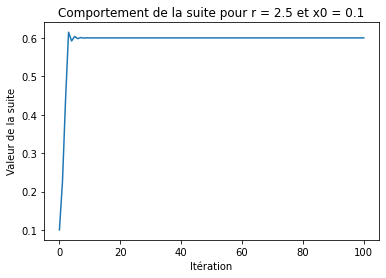

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, r):
    return r * (1 - x) * x

r = 2.5
x0 = 0.1
n = 100 #Itération

def n_sequence(r, x0, n): # On définit la séquence pour 100 répétitions
    sequence = [x0]
    for i in range(n):
        xi = f(sequence[-1], r)
        sequence.append(xi)
    return sequence

sequence = n_sequence(r, x0, n)

plt.plot(sequence)
plt.title("Comportement de la suite pour r = 2.5 et x0 = 0.1")
plt.xlabel("Itération")
plt.ylabel("Valeur de la suite")
plt.show()


Notre suite semble avoir une limite en 0.6 pour r=2.5 et $x_o$=0.1, mais si on remplace r par une autre valeur comme 3.5 on obtient un graphique totalement différent. On a donc une suite qui est très sensible aux conditions initiales.

## Diagramme de bifurcation

Après avoir étudier le comportement de la suite, nous allons faire un diagramme de bifurcation. Le but étant d'étudier la limite de la suite des $x_i$ définie par l'équation logistique. On souhaite comprendre la manière dont cette limite dépend de la valeur de $r$.

Pour ce faire, on va prendre 100000 valeurs de r comprise entre 2.5 et 4, tout en gardant $x_o$ à 0.00001. Pour chaque valeurs de r, on va devoir calculer les 1000 premiers termes de la suite. Ensuite, on gardera ensuite les 100 derniers termes et ils sont censés être similaires.

Afin de réalise ce qu'on a dit précedemment, on met en place un code qui calculera tout cela et qui réalisera le graphique des 100 derniers termes de la suite en fonction de r



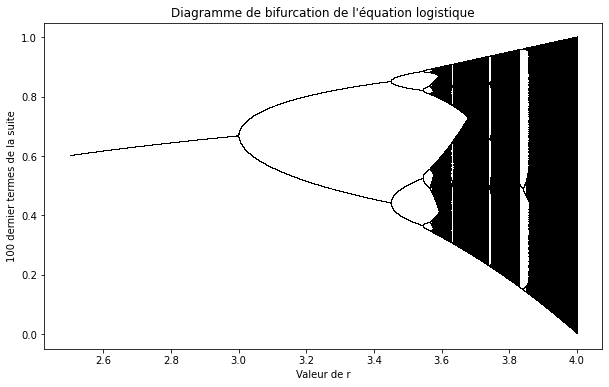

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def eq_logistique(r, x): # On definit l'équation logistique 
    return r * x * (1 - x)

x0 = 0.00001 #valeur initiale
n = 1000 #nombre d'itération

def suite_eq_logistique(r, x0, n): # On définit une sequence qui génére une suite logistique
    sequence = [x0]
    for _ in range(n - 1):
        xn = sequence[-1]
        sequence.append(eq_logistique(r, xn))
    return sequence[-100:]  # Garde seulement les 100 derniers termes

rv = np.linspace(2.5, 4, 100000) # Releve 100000 valeurs de r entre 2.5 et 4
plt.figure(figsize=(10, 6)) #dimension de la figure
for r in rv:
    sequence = suite_eq_logistique(r, x0, n) #suite logistique
    x= [r] * len(sequence) # Pour une même valeur de r, on renvoie le nombre de points pour une même valeur de r
    plt.plot(x, sequence, ',k')

plt.xlabel('Valeur de r')
plt.ylabel('100 dernier termes de la suite')
plt.title('Diagramme de bifurcation de l\'équation logistique')
plt.show()

À partir du diagramme de bifurcation de l'équation logistique mis en place, on peut en tirer plusieurs conclusions :

1. **Dépendance de la limite de r :** Pour certaines valeurs de r, les 100 derniers termes de la suite $x_i$ semblent converger vers une valeur limite unique. Cela suggère que la limite de la suite dépend fortement de la valeur de r . Pour des valeurs spécifiques de r, la suite peut converger vers un nombre fini de valeurs, ou même présenter des comportements chaotiques.

2. **Sensibilité aux conditions initiales :** La valeur de $x_o$ est à 0.00001 dans notre script, les conditions initiales sont importantes dans notre équation logistique. Pour différentes valeurs de $x_o$, on peut observer des variations dans le comportement de la suite, notamment en ce qui concerne la convergence vers une limite ou le caractère chaotique de la suite. Cependant, dans le contexte de notre analyse, on a garder $x_o$ constant pour étudier la dépendance de la limite par rapport à r.

3. **Dépendance du diagramme de bifurcation de $x_o$ :** Le diagramme de bifurcation ne dépend pas de la valeur initiale $x_o$, car on a choisi de garder la valeur de $x_o$ à 0.00001. Mais si on avait choisi une autre valeur pour $x_o$, on aurait surement observe des variations dans la manière de converger ou de diverger des valeurs de x pour différentes valeurs de r

Ce diagramme de bifurcation de l'équation logistique met en évidence les comportements de convergence et de divergence de la suite pour différentes valeurs de r, avec $x_o$, la valeur initiale maintenu a 0.00001 pour analyser la dépendance de la limite par rapport à r.

## Exposant de Lyapunov

Désormais, nous allons essayé de calculer pour chaque valeurs de r entre 2.5 et 4, la valeur de l’exposant de Lyapunov λ (autrement dit lambda). On sait qu'une différence aussi petite soit-elle sur deux conditions initiales peut provoquer une divergence au niveau de leur comportement asymptotique. 


On mesure cette différence entre les deux solutions à travers une forme exponentielle   $$ e^{t \lambda(r)} $$

On définit l'expression $\lambda(r)$ comme  $$\lambda = \lim\limits_{n \rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log | f^{\prime} (x_i)| $$


Si la fonction λ est positif, la suite diverge et si elle est negatif elle converge, nous allons donc représenter cette situation à travers un graphique. Pour cela, nous allons mettre en place à code qui va répondre à nos besoins.


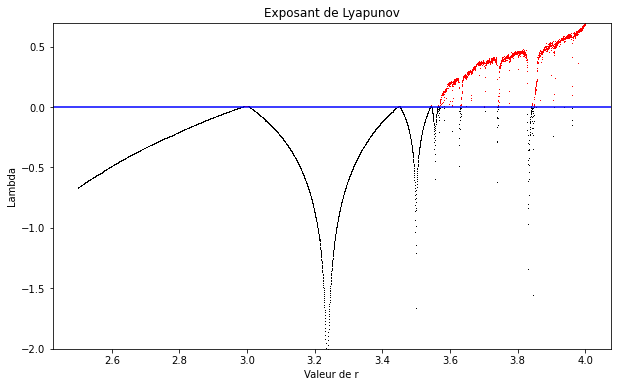

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def eq_logistique(r, x): # On definit l'equation logistique 
    return r * x * (1 - x)

def eq_logistique_derive(r, x): # Derivé de l'équation logistique
    return r - 2 * r * x

def expo_lyapunov(r, x0, n): # On definit l'exposant de lyapunov
    somme_log_derive = 0 #reference
    xn = x0
    for i in range(n):
        somme_log_derive += np.log(np.abs(eq_logistique_derive(r, xn))) # On calcule le logarithme de la vableur absolue de la dérivé de l'équation logisitque pui sl'ajoute à la somme
        xn = eq_logistique(r, xn)
    return somme_log_derive / n

valeur_r = np.linspace(2.5, 4, 5000) # On genere 5000 valeur de r comrpise entre 2.5 et 4
valeur_lyapunov = [] #Liste qui permet de stocker les valeurs de l'exposant de Lyapunov pour chaque valeur de r

for r in valeur_r:
    valeur_lyapunov.append(expo_lyapunov(r, 0.00001, 1000)) # Calcul de l'exposant de Lyapunov compris entre 2.5 et 4
    
plt.figure(figsize=(10, 6)) #Créer et définir la taille du graphe  
for r, lyapunov in zip(valeur_r, valeur_lyapunov): # On associe chaque valeur de r à une valeur de l'exposant de Lyapunov
    if lyapunov < 0:
        plt.plot(r, lyapunov, ',', color='black', markersize=10)  # Point noir pour λ < 0
    else:
        plt.plot(r, lyapunov, ',', color='red', markersize=10)  # Point rouge pour λ > 0

plt.axhline(y=0, color='b')  # Ligne horizontale bleue pour λ = 0
plt.xlabel('Valeur de r')
plt.ylabel('Lambda')
plt.ylim(-2,max(valeur_lyapunov)) # Limite de y entre -2 et la valeur max de 'valeur_lyapunov'
plt.title('Exposant de Lyapunov')
plt.show()


Grâce au graphique de l'exposant de Lyanupov, nous avons un autre point de vue sur la stabilité de l'équation logistique par rapport au diagramme de bifurcation et nous pouvons emettre quelques conclusions par rapport à la stabilité de l'équation logistique :

1. Les points situés en dessous de la ligne horizontale bleue λ = 0 représentent les valeurs de r pour lesquelles l'équation logistique est stable. Alors, les perturbations initiales dans la valeur de x décroissent avec le temps, et le système converge vers un état d'équilibre. À l'inverse, les points au-dessus de la ligne bleue indiquent une instabilité, où de petites perturbations initiales augmentent avec le temps, entraînant un comportement chaotique ou divergent.

2. On remarque une transition entre la stabilité à l'instabilité lorsque λ devient positif pour des valeurs de r au-dessus de l'axe y=0 (lorsque λ=0). De plus, on le voit aussi dans le diagramme de bifurcation, où l'on constate des bifurcations périodiques.

3. Nous remarquons que ce graphique complète le diagramme de bifurcation en nous fournissant plus d'information sur la stabilité du système. Lorsque les valeurs de l'exposant de Lyapunov sont négatives, elles nous renseignent une instabilité tandis que lorsqu'elles sont positives, elles indiquent la stabilité du systeme

En résumé, le graphique de l'exposant de Lyapunov en fonction de r donne des renseignements sur la stabilité de l'équation logistique, mettant en évidence les transitions de stabilité à instabilité quand r varie. Cela complète le diagramme de bifurcation en fournissant une analyse plus approfondie du comportement du système.

## Conclusion

Nous avons étudié le sujet sous différentes formes, que ce soit en étudiant le comportement de la suite ou encore en réalisant des graphes, diagrammes. On a commencé à le comportement de la suite sur un graphique, pour r=2.5 et $x_o$=0.1, on avait une limite en 0.6, mais si on change la valeur de r, on peut prendre 4 ou même 3,et on aura une courbe qui sera totalement différente et qui ne tendra pas vers 0.6. On commence à avoir un aperçue de l'aspect chaotique de la suite.

Ensuite on a fait un diagramme de bifurcation, qui nous a renforcé l'idée que notre suite logistique est chaotique de. C'est-à-dire que l'on a pu voir une grande dépendance aux valeurs de r mais aussi une sensibilité aux conditions initiales, comme $x_o$ = 0.00001. Si on change la valeur de $x_o$, le diagramme sera différent, mais on ne l'a pas fait pour étudier la dépendance de la limite par rapport à r. On a alors commencé à comprendre qu'on avait système chaotique car on remarqué la différence de points présents pour une même valeur de r entre le début du graphe et à la fin où l'on a vraiment des traits assez épais. C'est a dire, une partie stable et l'autre instable. On est allé plus loin dans cette idée en s'intéressant à l'exposant de Lyapunov.

On a souhaité approfondir cette analyse et on a alors réalisé un graphe representant la variation de l'exposant de Lyapunov. Ce graphe nous a alors illustré pour quelles valeurs de r et de $\lambda$ le système était stable et pour lesquelles le système était dit instable. Lorsque $\lambda$ < 0, le système est stable car il semble converger vers un état d'équilibre. Alors qu'à l'inverse, quand $\lambda$ > 0, le système diverge. Ce graphique complète le diagramme de bifurcation vu précédemment.

On a donc une suite chaotique puisque l'on a belle et bien une sensibilité aux conditions initiales, une non-linéarite, des bifurcations ainsi qu'une dynamique complexe (cercle periodique).